# Portfolio Assignment: Machine Learning with sklearn
#### Aloksai Choudari (axc190063)
#### CS 4375.003
#### 11/3/2022

# Read Auto data

In [ ]:
# importing pandas library and read Auto.csv
import pandas as pd
df = pd.read_csv('Auto.csv')

In [ ]:
# print top 5 rows of data
print(df.head(5))

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
# print the data dimensions
print(df.shape)

(392, 9)


# Data exploration

In [ ]:
# describe() mpg, weight, and year
print(df.loc[:, ['mpg', 'weight', 'year']].describe())

# mpg - average: 23.445918, range: 37.6
# weight - average: 2977.584184, range: 3527
# year - average: 76.010256, range: 12

              mpg       weight        year
count  392.000000   392.000000  390.000000
mean    23.445918  2977.584184   76.010256
std      7.805007   849.402560    3.668093
min      9.000000  1613.000000   70.000000
25%     17.000000  2225.250000   73.000000
50%     22.750000  2803.500000   76.000000
75%     29.000000  3614.750000   79.000000
max     46.600000  5140.000000   82.000000


### 3. Explore data types

In [ ]:
# check data types
print(df.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object


In [ ]:
# make cylinders column categorical
df.cylinders = df.cylinders.astype('category').cat.codes

In [ ]:
# make origin column categorical
df.origin = df.origin.astype('category')

In [ ]:
# check data types again
print(df.dtypes)

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


# Deal with NAs

In [ ]:
# drop all NA rows
df = df.dropna()

In [ ]:
# print new data dimensions
print(df.shape)

(389, 9)


# Modify Columns

In [ ]:
# make new mpg_high column
mean = df.mpg.mean()
df['mpg_high'] = df.mpg > mean
df.mpg_high = df.mpg_high.astype('category').cat.codes

In [ ]:
# drop mpg and name columns
df = df.drop(columns=['mpg', 'name'])

In [ ]:
# print top 5 rows of data
print(df.head(5))

   cylinders  displacement  horsepower  weight  acceleration  year origin  \
0          4         307.0         130    3504          12.0  70.0      1   
1          4         350.0         165    3693          11.5  70.0      1   
2          4         318.0         150    3436          11.0  70.0      1   
3          4         304.0         150    3433          12.0  70.0      1   
6          4         454.0         220    4354           9.0  70.0      1   

   mpg_high  
0         0  
1         0  
2         0  
3         0  
6         0  


# Data exploration with graphs

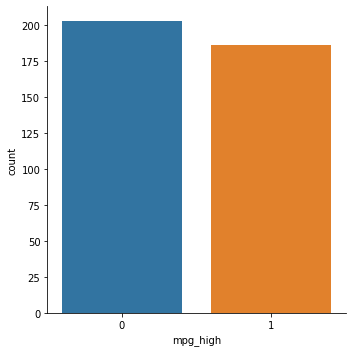

In [ ]:
# make a catplot for mpg_high
import seaborn as sb
sb.catplot(x='mpg_high', kind='count', data=df)

According to the first graph, most of the mpgs for the cars are below average.

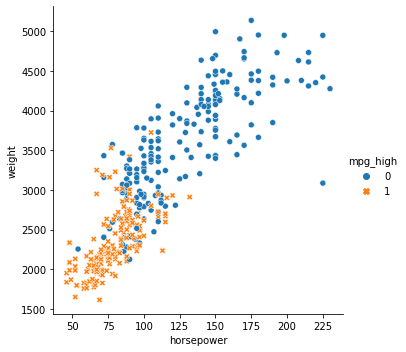

In [ ]:
# make a relplot with weight based on horsepower
sb.relplot(x='horsepower', y='weight', data=df, hue=df.mpg_high, style=df.mpg_high)

According to this graph, the higher the horsepower, the more the car weighs plus more mpg.

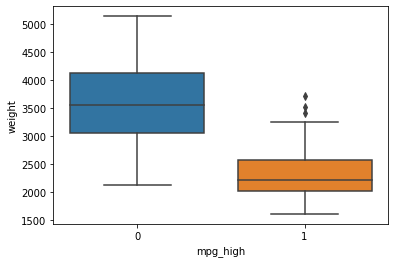

In [ ]:
# make a boxplot with weight based on mpg_high
sb.boxplot(x='mpg_high', y='weight', data=df)

According to the graph, the lower the mpg the more the car weighs.

# Train/test split

In [ ]:
# seed 1234
import random
random.seed(1234)

# split train/test
from sklearn.model_selection import train_test_split
X = df.loc[:, df.columns != 'mpg_high']
y = df.mpg_high
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# print train/test dimensions
print('train size:', X_train.shape)
print('test size:', X_test.shape)

train size: (311, 7)
test size: (78, 7)


# Logistic Regression

In [ ]:
# logistic regression model (solver=lbfgs)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))

0.9035369774919614


In [ ]:
# test
pred = lr.predict(X_test)

# evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy = ', accuracy_score(y_test, pred))
print('Precision = ', precision_score(y_test, pred))
print('Recall = ', recall_score(y_test, pred))
print('F1 = ', f1_score(y_test, pred))

Accuracy =  0.8589743589743589
Precision =  0.7948717948717948
Recall =  0.9117647058823529
F1 =  0.8493150684931507


In [ ]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        44
           1       0.79      0.91      0.85        34

    accuracy                           0.86        78
   macro avg       0.86      0.86      0.86        78
weighted avg       0.87      0.86      0.86        78



# Decision Tree

In [ ]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))

1.0


In [ ]:
# test
pred2 = dt.predict(X_test)

# evaluate
print('Accuracy = ', accuracy_score(y_test, pred2))
print('Precision = ', precision_score(y_test, pred2))
print('Recall = ', recall_score(y_test, pred2))
print('F1 = ', f1_score(y_test, pred2))

Accuracy =  0.8974358974358975
Precision =  0.8823529411764706
Recall =  0.8823529411764706
F1 =  0.8823529411764706


In [ ]:
# classification report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.88      0.88      0.88        34

    accuracy                           0.90        78
   macro avg       0.90      0.90      0.90        78
weighted avg       0.90      0.90      0.90        78



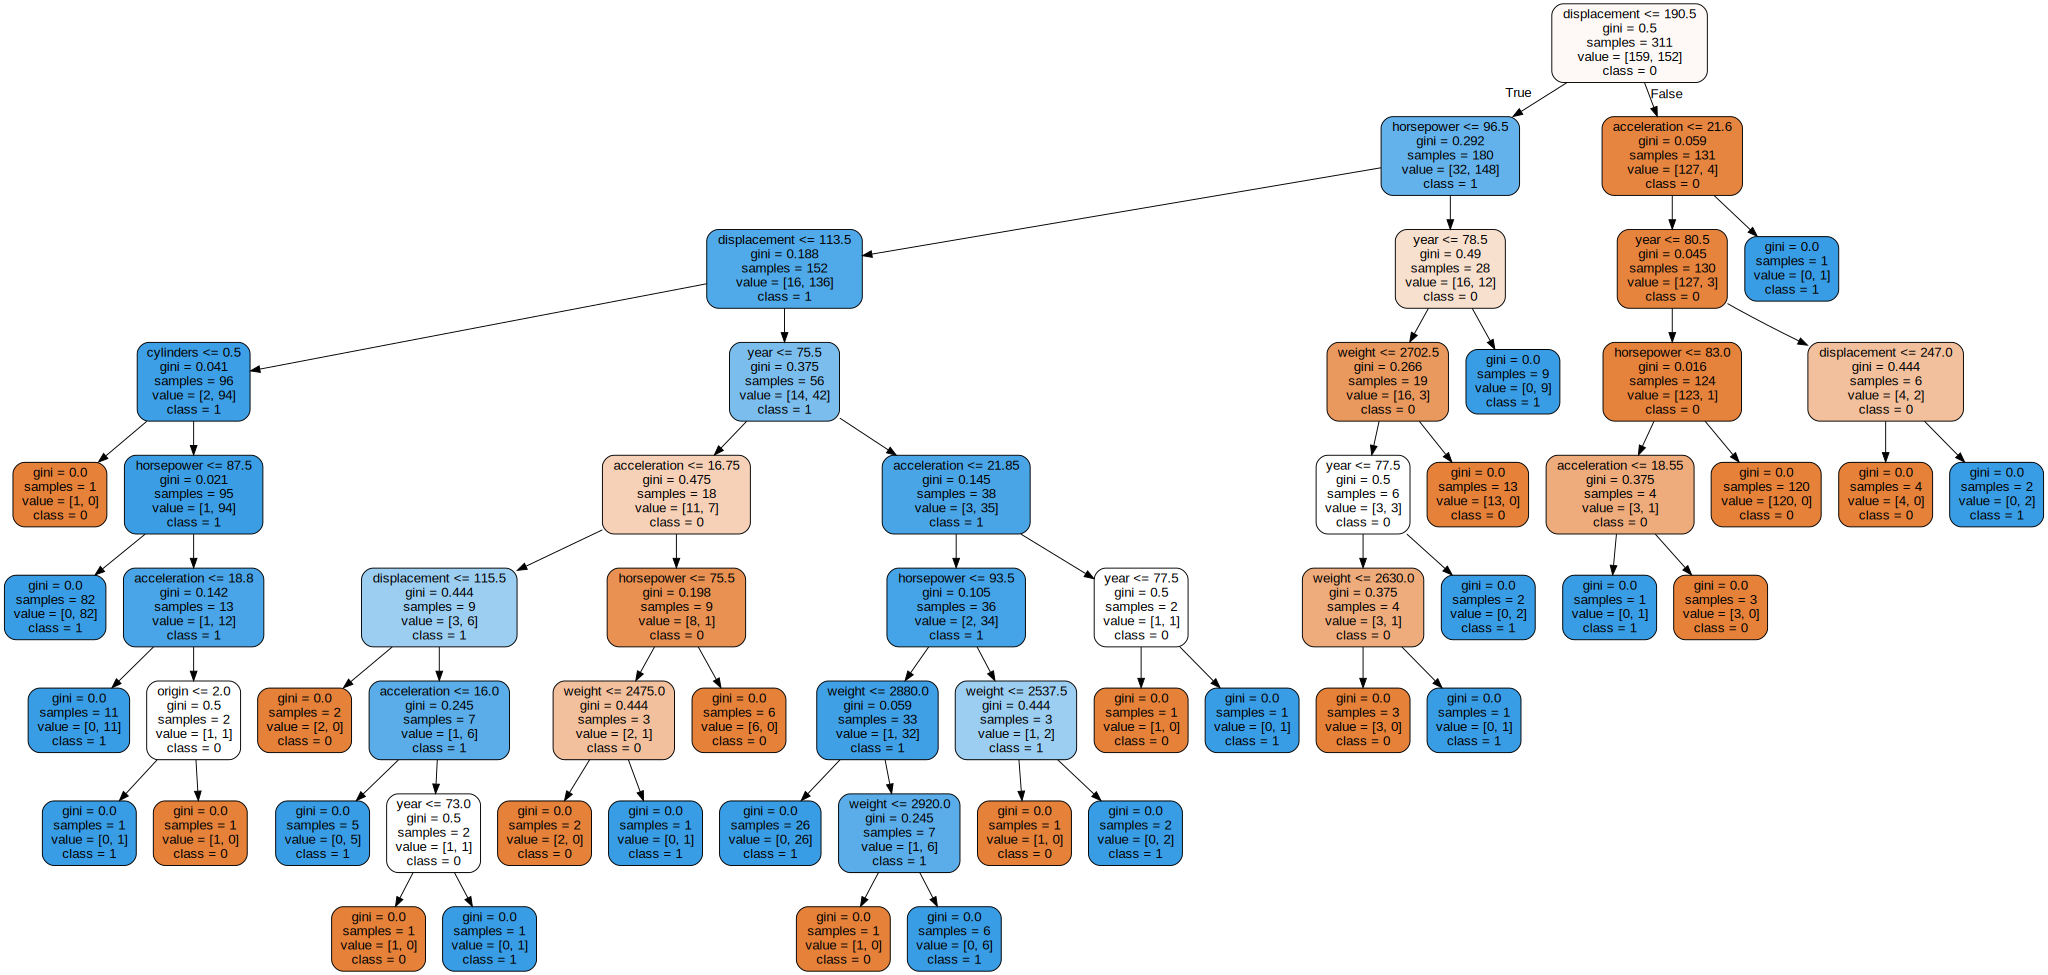

In [ ]:
# plot decision tree
from sklearn import tree
import graphviz
data = tree.export_graphviz(dt, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True)
graphviz.Source(data)

# Neural Network

In [ ]:
# normalize data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# neural network
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2), max_iter=500, random_state=1234)
nn.fit(X_train_scaled, y_train)
print(nn.score(X_train_scaled, y_train))

0.9421221864951769


In [ ]:
# test
pred3 = nn.predict(X_test_scaled)

# evaluate
print('Accuracy = ', accuracy_score(y_test, pred3))
print('Precision = ', precision_score(y_test, pred3))
print('Recall = ', recall_score(y_test, pred3))
print('F1 = ', f1_score(y_test, pred3))

Accuracy =  0.8846153846153846
Precision =  0.8787878787878788
Recall =  0.8529411764705882
F1 =  0.8656716417910447


In [ ]:
# classification report
print(classification_report(y_test, pred3))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        44
           1       0.88      0.85      0.87        34

    accuracy                           0.88        78
   macro avg       0.88      0.88      0.88        78
weighted avg       0.88      0.88      0.88        78



In [ ]:
# 2nd neural network with different settings
nn2 = MLPClassifier(solver='sgd', hidden_layer_sizes=(3,), max_iter=1500, random_state=1234)
nn2.fit(X_train_scaled, y_train)
print(nn2.score(X_train_scaled, y_train))

0.8778135048231511


In [ ]:
# test
pred4 = nn2.predict(X_test_scaled)

# evaluate
print('Accuracy = ', accuracy_score(y_test, pred4))
print('Precision = ', precision_score(y_test, pred4))
print('Recall = ', recall_score(y_test, pred4))
print('F1 = ', f1_score(y_test, pred4))

Accuracy =  0.9102564102564102
Precision =  0.8648648648648649
Recall =  0.9411764705882353
F1 =  0.9014084507042254


In [ ]:
# classification report
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        44
           1       0.86      0.94      0.90        34

    accuracy                           0.91        78
   macro avg       0.91      0.91      0.91        78
weighted avg       0.91      0.91      0.91        78



The second neural network had 91% accuracy, while the first one had 88% accuracy, which was a result of the max number of iterations. The reason why the second neural network performed better was because it had only one hidden layer, compared to the two hidden layers that the first one had.

#Analysis

## Which algorithm performed better?
The neural network algorithm.

## Comparing accuracy, recall, and precision metrics by class
With an accuracy and precision of 92% and 95% respectively, class 0 was higher than class 1, which had an accuracy of 90% and precision of 86%. On the other hand, class 0 had a recall of 89% which was lower than class 1's 94%.

## Why did the neural network algorithm outperform the others?
The reason why the neural networks outperformed the others is because, unlike the traditional ML models, the neural networks can make predictions of unseen data and can forecast data better.

##Comparing my experiences using R versus sklearn
Compared to R, sklearn was much faster during runtime, which made it easier for models and data prediction. Along with that, the environment that Google Colab provides seemed a bit more readable and traditional compared to RStudio. Although I liked a lot of the built-in functions in R and the ability to generate pdfs quicker, I feel Python with sklearn is a better option to use.